# Mudcard
- **why is only the second column of predict_proba being used to find the best critical probability?**
    - You can use either column but be careful of how you convert the critical probability to a predicted class
    - If you use the first column, that's class 0 predicted probability. If it is larger than 50%, you need to predict class 0.
    - If you use the second column, that's class 1 predicted probability. If it is larger than 50%, you need to predcit class 1.
- **For decision trees and random forest, will we need to do the steps that we did during the quiz? Or is that what python will do for us?**
    - slearn optimizes the decision tree for you and it also aggregates the votes of trees if you use a random forest 



## Supervised ML algorithms
By the end of this week, you will be able to
- Summarize how decision trees, random forests, and support vector machines work
- Describe how the predictions of these techniques behave in classification and regression
- Describe which hyper-parameters should be tuned

### A decision tree in regression

In [1]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
np.random.seed(10)
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

n_samples = 30

X = np.random.rand(n_samples)
y = true_fun(X) + np.random.randn(n_samples) * 0.1

X_new = np.linspace(0, 1, 1000)

reg = RandomForestRegressor(n_estimators=1,max_depth=1)
reg.fit(X[:, np.newaxis],y)
y_new = reg.predict(X_new[:, np.newaxis])


In [2]:
help(RandomForestRegressor)

Help on class RandomForestRegressor in module sklearn.ensemble._forest:

class RandomForestRegressor(ForestRegressor)
 |  RandomForestRegressor(n_estimators=100, *, criterion='squared_error', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=1.0, max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None)
 |  
 |  A random forest regressor.
 |  
 |  A random forest is a meta estimator that fits a number of classifying
 |  decision trees on various sub-samples of the dataset and uses averaging
 |  to improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is controlled with the `max_samples` parameter if
 |  `bootstrap=True` (default), otherwise the whole dataset is used to build
 |  each tree.
 |  
 |  For a comparison between tree-based ensemble models see the example
 |  :ref:`sphx_glr_auto_examp

In [3]:
#############################################################
# HUGE thanks to Drew Solomon and Yifei Song (DSI alumni) 
# for preparing the visualizations in this lecture!
#############################################################
# check out helper_functions.ipynb for more details
%run ./helper_functions.ipynb

hyperparameters = {
    'n_estimators': [1, 3, 10, 30],
    'max_depth': [1, 2, 3, 10, 30]
}

vis(X, y, RandomForestRegressor, hyperparameters, X_new)

interactive(children=(SelectionSlider(description='n_estimators', options=(1, 3, 10, 30), value=1), SelectionS…

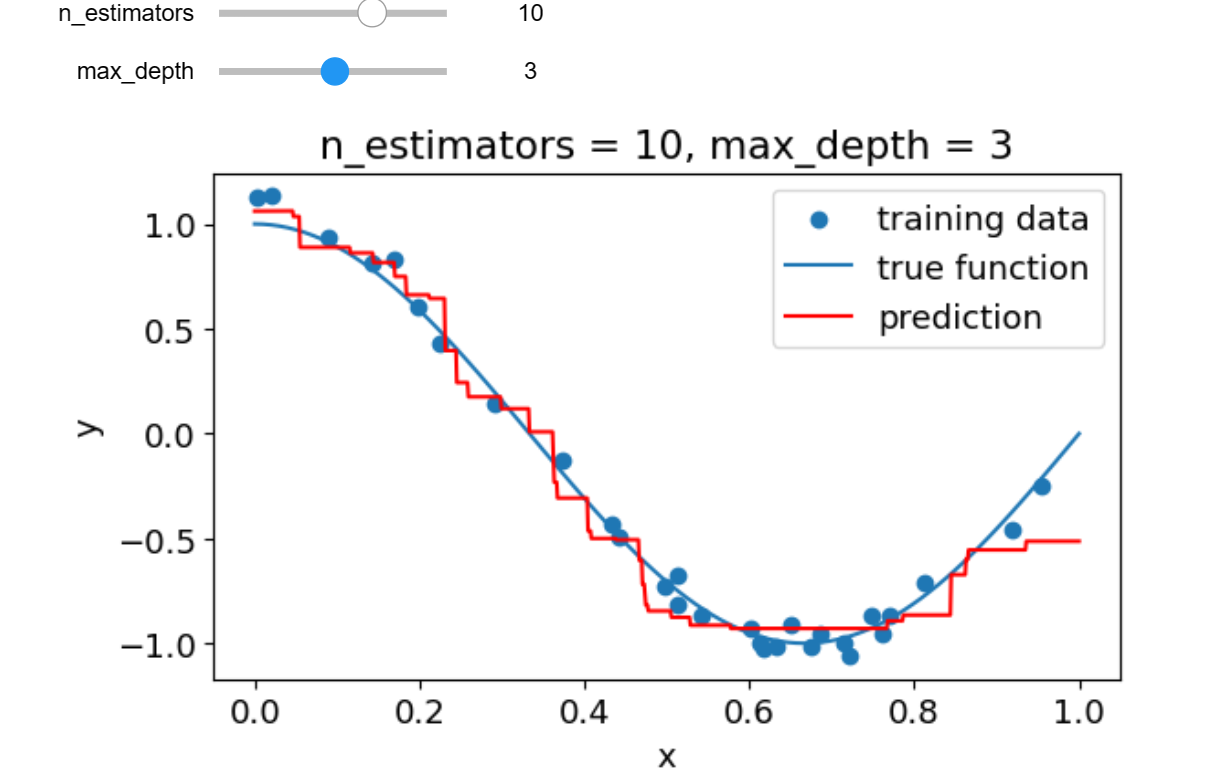

n_estimator: each tree is using a fraction of data points

max_depth: can have as many steps as the number of datapoints

## How to avoid overfitting with random forests?
- tune some (or all) of following hyperparameters:
   - max_depth
   - max_features
- With sklearn random forests, **do not tune n_estimators**!
   - the larger this value is, the better the forest will be
   - set n_estimators to maybe 100 while tuning hyperparameters
   - increase it if necessary once the best hyperparameters are found
- Some people don't like the steps (non-smooth) function given by random forest regression
- Random forest is easy to interpret only when the hypter-params are small

| ML algo | suitable for large datasets? | behaviour wrt outliers | non-linear? | params to tune | smooth predictions | easy to interpret? |
| - | :-: | :-: | :-: | :-: | :-: | :-: |
| linear regression            	|              yes             	|linear extrapolation|      no     	| l1 and/or l2 reg 	| yes | yes|
| logistic regression          	|              yes             	|scales with distance from the decision boundary|      no     	| l1 and/or l2 reg 	| yes | yes|
| random forest regression     	|<font color='red'>so so</font> |<font color='red'>constant</font>|<font color='red'>yes</font>|<font color='red'>max_features,  max_depth</font>| <font color='red'>no</font>|<font color='red'>so so</font>|
| random forest classification 	|              tbd             	|           tbd          	|     tbd     	|        tbd       	| tbd | tbd|
| SVM rbf regression               	|              tbd             	|           tbd          	|     tbd     	|        tbd       	| tbd | tbd|
| SVM rbf classification           	|              tbd             	|           tbd          	|     tbd     	|        tbd       	| tbd | tbd|


## A random forest in classification

In [4]:
from sklearn.datasets import make_moons
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import ParameterGrid

# create the data
X,y = make_moons(noise=0.2, random_state=1,n_samples=200)
# set the hyperparameters
clf = RandomForestClassifier(n_estimators=1,max_depth=3,random_state=0)
# fit the model
clf.fit(X,y)
# predict new data
#y_new = clf.predict(X_new)
# predict probabilities
#y_new = clf.predict_proba(X_new)

RandomForestClassifier(max_depth=3, n_estimators=1, random_state=0)

In [5]:
help(RandomForestClassifier)

Help on class RandomForestClassifier in module sklearn.ensemble._forest:

class RandomForestClassifier(ForestClassifier)
 |  RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
 |  
 |  A random forest classifier.
 |  
 |  A random forest is a meta estimator that fits a number of decision tree
 |  classifiers on various sub-samples of the dataset and uses averaging to
 |  improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is controlled with the `max_samples` parameter if
 |  `bootstrap=True` (default), otherwise the whole dataset is used to build
 |  each tree.
 |  
 |  For a comparison between tree-based ensemble models see the example
 |  :ref:`sp

In [6]:
# initialize RandomForestClassifier
ML_algo = RandomForestClassifier(random_state=42) 

# set RF parameter grid
hyperparameters = {
    'n_estimators': [1, 3, 10, 30],
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}

plot_clf_contour(hyperparameters, X, y)

interactive(children=(SelectionSlider(description='n_estimators', options=(1, 3, 10, 30), value=1), SelectionS…

FigureWidget({
    'data': [{'colorbar': {'title': {'text': 'predicted probability'}},
              'colorsca…

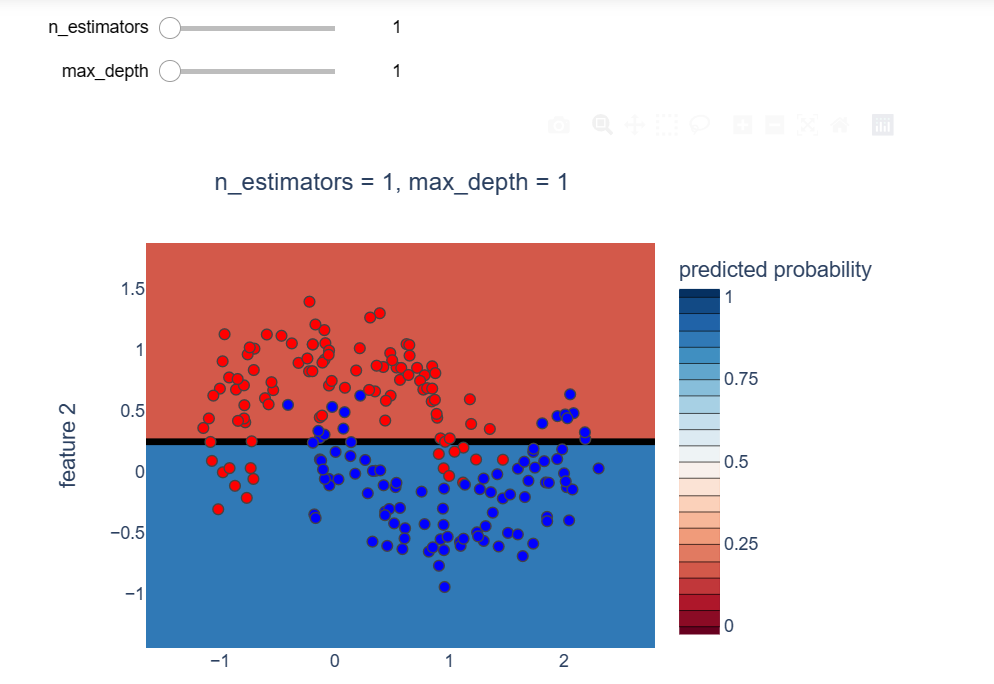
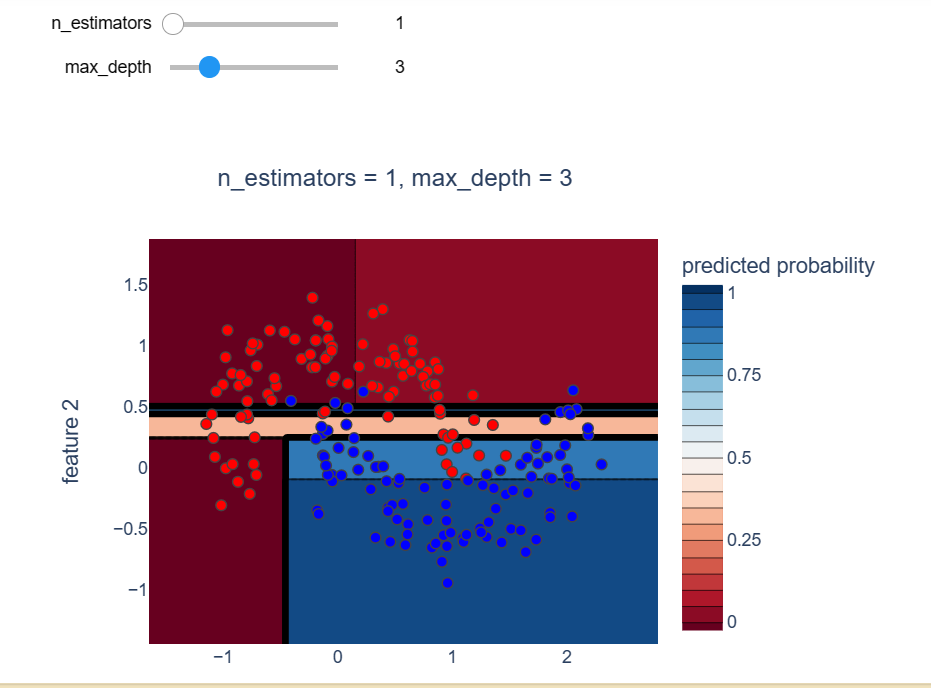
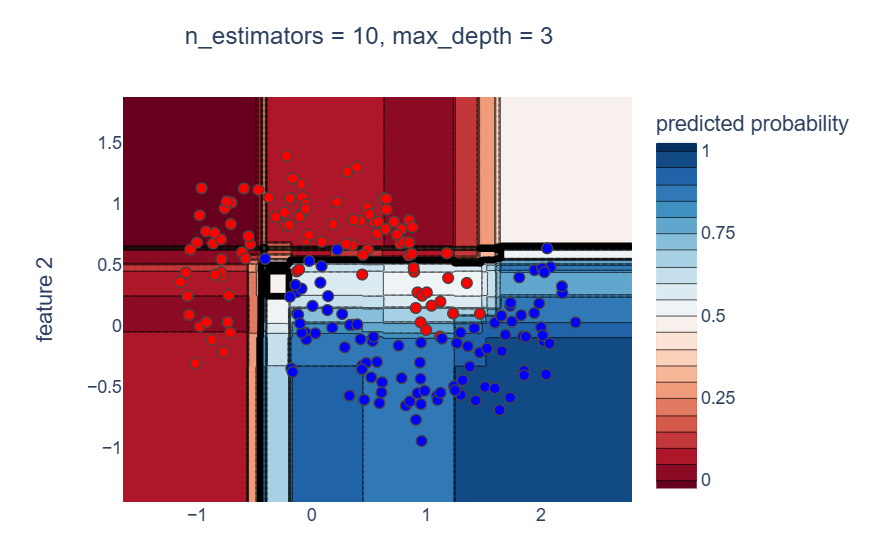

| ML algo | suitable for large datasets? | behaviour wrt outliers | non-linear? | params to tune | smooth predictions | easy to interpret? |
| - | :-: | :-: | :-: | :-: | :-: | :-: |
| linear regression            	|              yes             	|linear extrapolation|      no     	| l1 and/or l2 reg 	| yes | yes|
| logistic regression          	|              yes             	|scales with distance from the decision boundary|      no     	| l1 and/or l2 reg 	| yes | yes|
| random forest regression     	|so so|constant|yes|max_features,  max_depth|no|so so|
| random forest classification 	|<font color='red'>so so</font> |<font color='red'>step-like, difficult to tell</font>|<font color='red'>yes</font>|<font color='red'>max_features,  max_depth</font>| <font color='red'>no</font>|<font color='red'>so so</font>|
| SVM rbf regression               	|              tbd             	|           tbd          	|     tbd     	|        tbd       	| tbd | tbd|
| SVM rbf classification           	|              tbd             	|           tbd          	|     tbd     	|        tbd       	| tbd | tbd|

# Quiz 1
- All trees are weighted equally in random forest
- It is possible to create a tree with a maximum depth larger than 1 which splits on the same feature on each level/node.

## Support Vector Machine
- very versatile technique, it comes in lots of flavors/types, read more about it [here](https://scikit-learn.org/stable/modules/svm.html)
- SVM classifier motivation
   - points in n dimensional space with class 0 and 1
   - we want to find the (n-1) dimensional hyperplane that best separates the points
   - this hyperplane is our (linear) decision boundary
- we cover SVMs with radial basis functions (rbf)
   - we apply a kernel function (a non-linear transformation) to the data points
   - the kernel function basically "smears" the  points
   - gaussian rbf kernel: $\exp(-\gamma (|x - x'|)^2)$ where $\gamma > 0$
   - Small gamma in regression: wide gaussion --> too small, a line
   - Large gamma: peaks in the fitting curve
   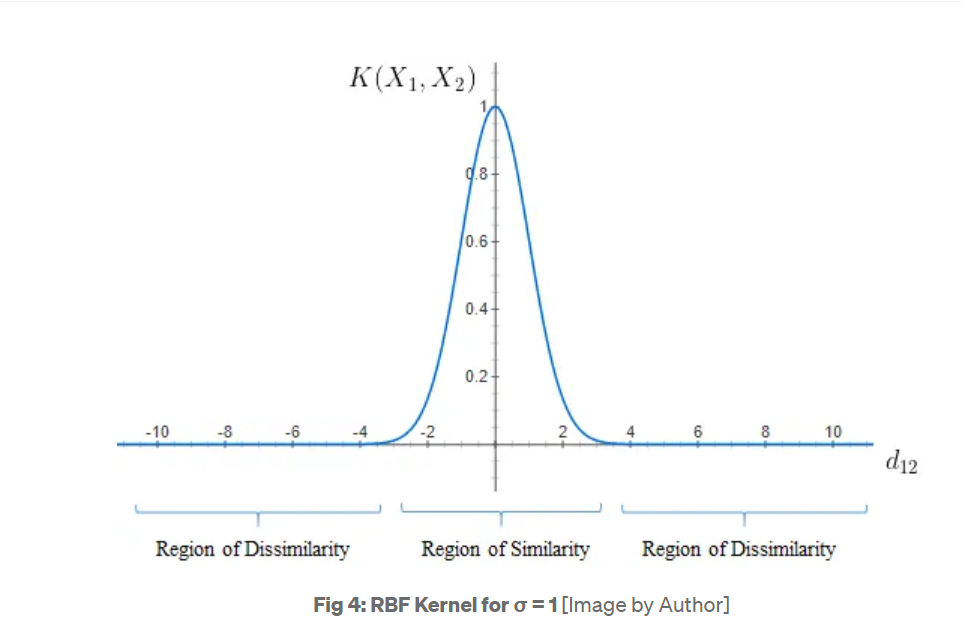

## SVR

In [7]:
import numpy as np
from sklearn.svm import SVR
np.random.seed(10)
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

n_samples = 30

X = np.random.rand(n_samples)
y = true_fun(X) + np.random.randn(n_samples) * 0.1

X_new = np.linspace(-0.5, 1.5, 2000)

reg = SVR(gamma = 1, C = 1)
reg.fit(X[:, np.newaxis],y)
y_new = reg.predict(X_new[:, np.newaxis])


In [8]:
help(SVR)

Help on class SVR in module sklearn.svm._classes:

class SVR(sklearn.base.RegressorMixin, sklearn.svm._base.BaseLibSVM)
 |  SVR(*, kernel='rbf', degree=3, gamma='scale', coef0=0.0, tol=0.001, C=1.0, epsilon=0.1, shrinking=True, cache_size=200, verbose=False, max_iter=-1)
 |  
 |  Epsilon-Support Vector Regression.
 |  
 |  The free parameters in the model are C and epsilon.
 |  
 |  The implementation is based on libsvm. The fit time complexity
 |  is more than quadratic with the number of samples which makes it hard
 |  to scale to datasets with more than a couple of 10000 samples. For large
 |  datasets consider using :class:`~sklearn.svm.LinearSVR` or
 |  :class:`~sklearn.linear_model.SGDRegressor` instead, possibly after a
 |  :class:`~sklearn.kernel_approximation.Nystroem` transformer or
 |  other :ref:`kernel_approximation`.
 |  
 |  Read more in the :ref:`User Guide <svm_regression>`.
 |  
 |  Parameters
 |  ----------
 |  kernel : {'linear', 'poly', 'rbf', 'sigmoid', 'precomput

In [9]:

hyperparameters = {
    'gamma': [1e-3, 1e-1, 1e1, 1e3, 1e5],
    'C': [1e-1, 1e0, 1e1]
}

vis(X, y, SVR, hyperparameters, X_new)


interactive(children=(SelectionSlider(description='gamma', options=(0.001, 0.1, 10.0, 1000.0, 100000.0), value…

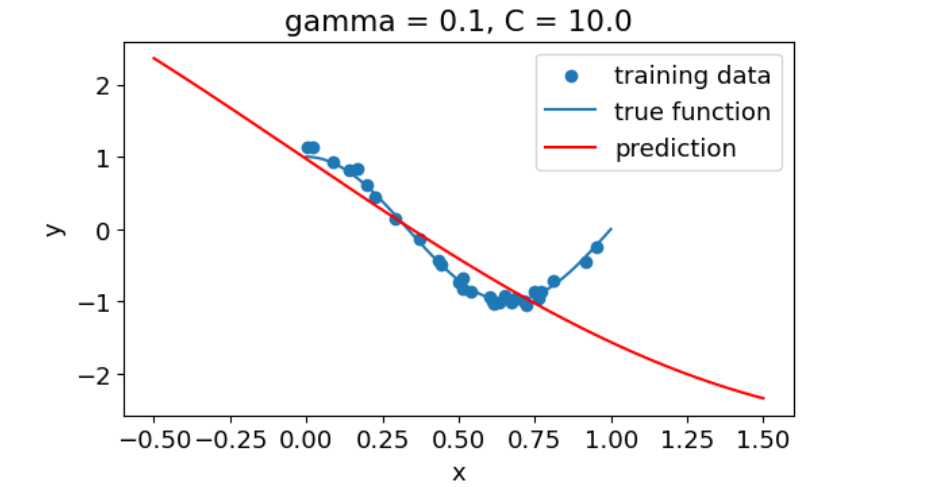
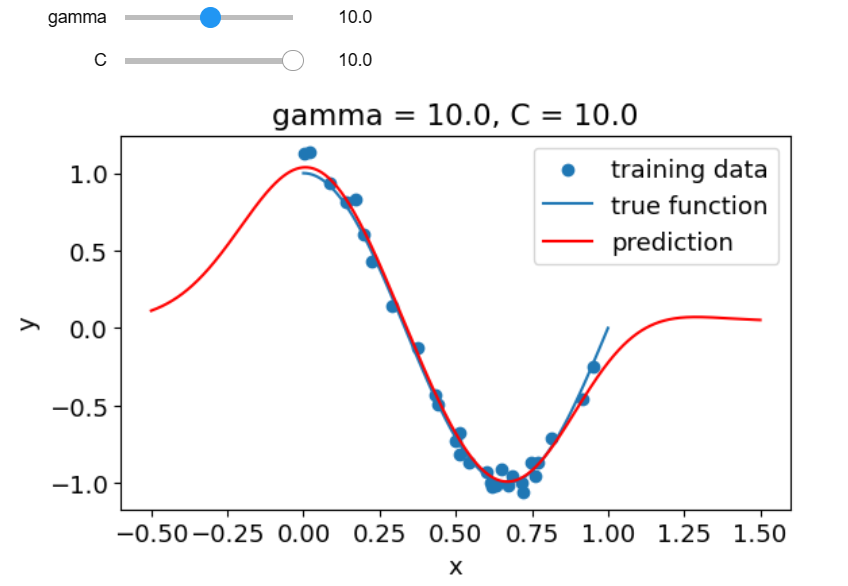
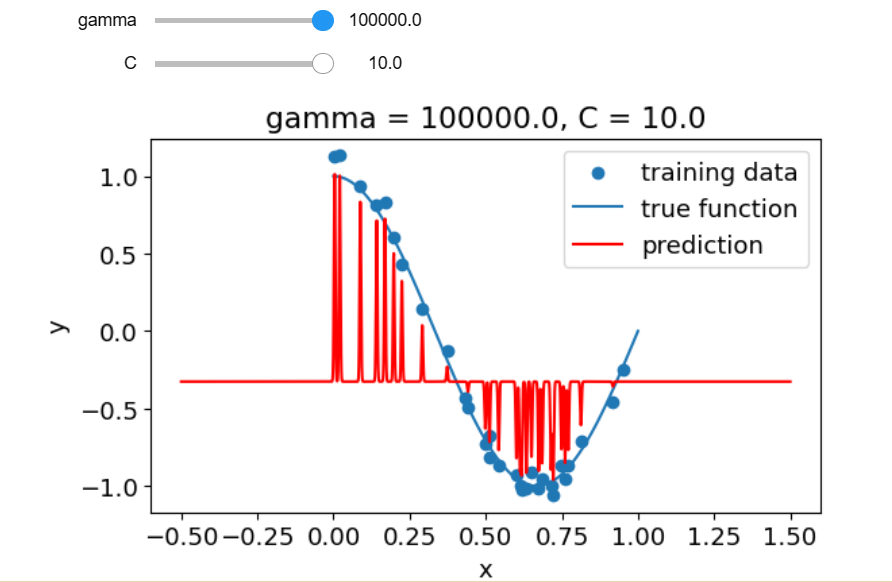

| ML algo | suitable for large datasets? | behaviour wrt outliers | non-linear? | params to tune | smooth predictions | easy to interpret? |
| - | :-: | :-: | :-: | :-: | :-: | :-: |
| linear regression            	|              yes             	|linear extrapolation|      no     	| l1 and/or l2 reg 	| yes | yes|
| logistic regression          	|              yes             	|scales with distance from the decision boundary|      no     	| l1 and/or l2 reg 	| yes | yes|
| random forest regression     	|so so |constant|yes|max_features,  max_depth| no|so so|
| random forest classification 	|so so |step-like, difficult to tell|yes|max_features,  max_depth| no|so so|
| SVM rbf regression               	|<font color='red'>no</font>|<font color='red'>non-linear extrapolation</font>|<font color='red'>yes</font>|<font color='red'>C, gamma</font>|<font color='red'>yes</font>|<font color='red'>so so</font>|
| SVM rbf classification           	|              tbd             	|           tbd          	|     tbd     	|        tbd       	| tbd | tbd|

# Quiz 2

Let's measure how long it takes to fit a linear regression, random forest regression, and SVR as a function of `n_samples` using our toy regression dataset. 

Check [this](https://stackoverflow.com/questions/7370801/how-do-i-measure-elapsed-time-in-python) stackoverflow post to figure out how to measure the execution time of a couple of lines of code. 

Set n_estimators to 10 and max_depth to 3 in the random forest. 

Set the gamma and C parameters to 1 in SVR. 

Fit models with n_samples = 1000, 2000, 3000, 4000, 5000. Measure how long it takes to fit each model.

Plot the run time as a function of n_samples for the three models. You might need to adjust the y axis range to check some of the statements.

Which of these statements are true?

- The random forest run-time scales linearly with n_samples.
- The linear regression model is the fastest to fit. 
- The SVR run-time scales worse than linear. (I.e., if we double n_sample, the fit time more than doubles.)


**Answer:**
- The random forest run-time scales linearly with n_samples. 
- The linear regression model is the fastest to fit. 
- The SVR run-time scales worse than linear. (I.e., if we double n_sample, the fit time more than doubles.)
- SVM is therefore not suitable for large datasets.

In [10]:
import time
import numpy as np
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(10)

n_samples_list = [1000, 2000, 3000, 4000, 5000]
linear_time = [[] for i in range(5)]
rf_time =  [[] for i in range(5)]
svr_time =  [[] for i in range(5)]

In [11]:
for n in range(len(n_samples_list)):
    n_samples = n_samples_list[n]
    X = np.random.rand(n_samples)
    y = true_fun(X) + np.random.randn(n_samples) * 0.1
    X_new = np.linspace(0, 1, 1000)
    
    for i in range(10):
        start_time = time.time()
        rf_reg = RandomForestRegressor(n_estimators=10,max_depth=3)
        rf_reg.fit(X[:, np.newaxis],y)
        y_new = rf_reg.predict(X_new[:, np.newaxis])
        rf_time[n].append(time.time()-start_time)
        
        start_time = time.time()
        svr = SVR(gamma = 1, C = 1)
        svr.fit(X[:, np.newaxis],y)
        y_new = svr.predict(X_new[:, np.newaxis])
        svr_time[n].append(time.time()-start_time)
        
        start_time = time.time()
        linear_reg = LinearRegression()
        linear_reg.fit(X[:, np.newaxis],y)
        y_new = linear_reg.predict(X_new[:, np.newaxis])
        linear_time[n].append(time.time()-start_time)

In [12]:
linear_time_mean = np.mean(np.array(linear_time), axis=1)
svr_time_mean = np.mean(np.array(svr_time), axis=1)
rf_time_mean = np.mean(np.array(rf_time), axis=1)

linear_time_std = np.std(np.array(linear_time), axis=1)
svr_time_std = np.std(np.array(svr_time), axis=1)
rf_time_std = np.std(np.array(rf_time), axis=1)

In [13]:
linear_time_mean

array([0.00742791, 0.00010073, 0.00312519, 0.        , 0.00101435])

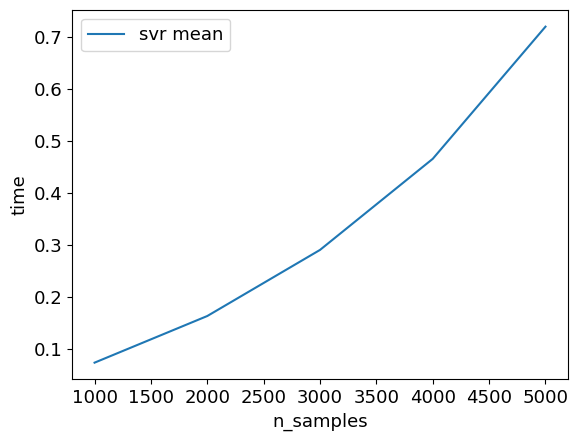

In [14]:
import matplotlib.pyplot as plt

#plt.plot(n_samples_list, linear_time_mean, label='linear reg mean')
plt.plot(n_samples_list, svr_time_mean, label='svr mean')
#plt.plot(n_samples_list, rf_time_mean, label='rf reg mean')

plt.xlabel("n_samples")
plt.ylabel("time")

plt.legend()
plt.show()

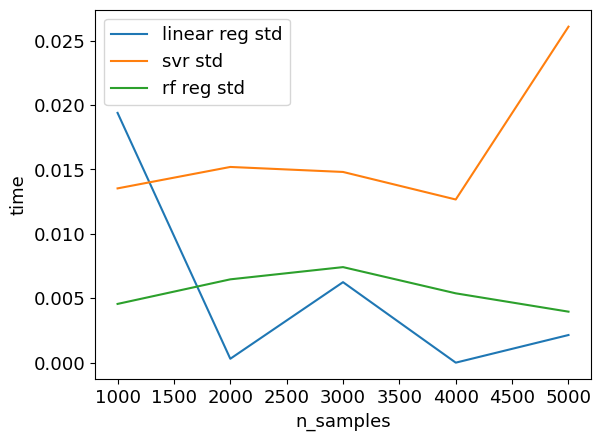

In [15]:
plt.plot(n_samples_list, linear_time_std, label='linear reg std')
plt.plot(n_samples_list, svr_time_std, label='svr std')
plt.plot(n_samples_list, rf_time_std, label='rf reg std')

plt.xlabel("n_samples")
plt.ylabel("time")

plt.legend()
plt.show()

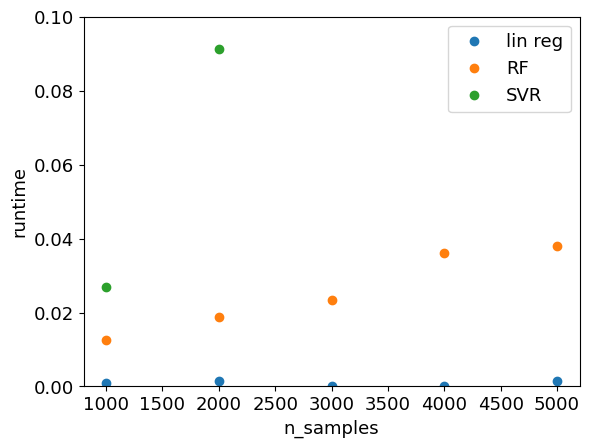

In [16]:
import time
from sklearn.linear_model import LinearRegression

n_samples = np.linspace(1000,5000,5,dtype=int)

timer_lin = []
timer_RF = []
timer_SVR = []

for n_sample in n_samples:
    X = np.random.rand(n_sample)
    y = true_fun(X) + np.random.randn(n_sample) * 0.1
    
    # add your code below

    times = []
    for i in range(10):
        reg = LinearRegression()
        start_time = time.time()
        reg.fit(X[:, np.newaxis],y)
        end_time = time.time()    
        times.append(end_time-start_time)
    timer_lin.append(np.mean(times))

    times = []
    for i in range(10):
        reg = SVR(gamma = 1, C = 1)
        start_time = time.time()
        reg.fit(X[:, np.newaxis],y)
        end_time = time.time()
        times.append(end_time-start_time)
    timer_SVR.append(np.mean(times))
    
    times = []
    for i in range(10):
        reg = RandomForestRegressor(n_estimators=10,max_depth=3)
        start_time = time.time()
        reg.fit(X[:, np.newaxis],y)
        end_time = time.time()  
        times.append(end_time-start_time)
    timer_RF.append(np.mean(times))

# prepare the plot below:
plt.plot(n_samples,timer_lin,'o',label='lin reg')
plt.plot(n_samples,timer_RF,'o',label='RF')
plt.plot(n_samples,timer_SVR,'o',label='SVR')
plt.xlabel('n_samples')
plt.ylabel('runtime')
plt.ylim([0,0.1])
plt.legend()
plt.show()

## SVC

In [17]:
from sklearn.datasets import make_moons
import numpy as np
from sklearn.svm import SVC

# create the data
X,y = make_moons(noise=0.2, random_state=1,n_samples=200)
# set the hyperparameters
clf = SVC(gamma = 1, C = 1, probability=True)
# fit the model
clf.fit(X,y)
# predict new data
#y_new = clf.predict(X_new)
# predict probabilities
#y_new = clf.predict_proba(X_new)

SVC(C=1, gamma=1, probability=True)

In [18]:
help(SVC)

Help on class SVC in module sklearn.svm._classes:

class SVC(sklearn.svm._base.BaseSVC)
 |  SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
 |  
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`~sklearn.svm.LinearSVC` or
 |  :class:`~sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`~sklearn.kernel_approximation.Nystroem` transformer or
 |  other :ref:`kernel_approximation`.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `g

In [19]:
# initialize RandomForestClassifier
ML_algo = SVC(probability=True)

# SVC parameter grid
hyperparameters = {
    'gamma': [1e-3, 1e-1, 1e1, 1e3, 1e5],
    'C': [1e-1, 1e0, 1e1]
}

plot_clf_contour(hyperparameters, X, y)

interactive(children=(SelectionSlider(description='gamma', options=(0.001, 0.1, 10.0, 1000.0, 100000.0), value…

FigureWidget({
    'data': [{'colorbar': {'title': {'text': 'predicted probability'}},
              'colorsca…

Overfitting for large gamma

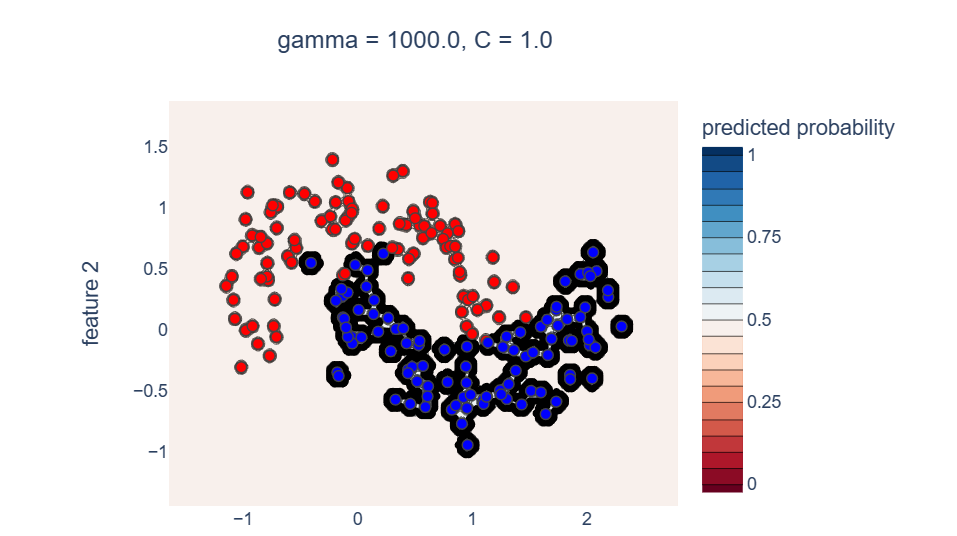
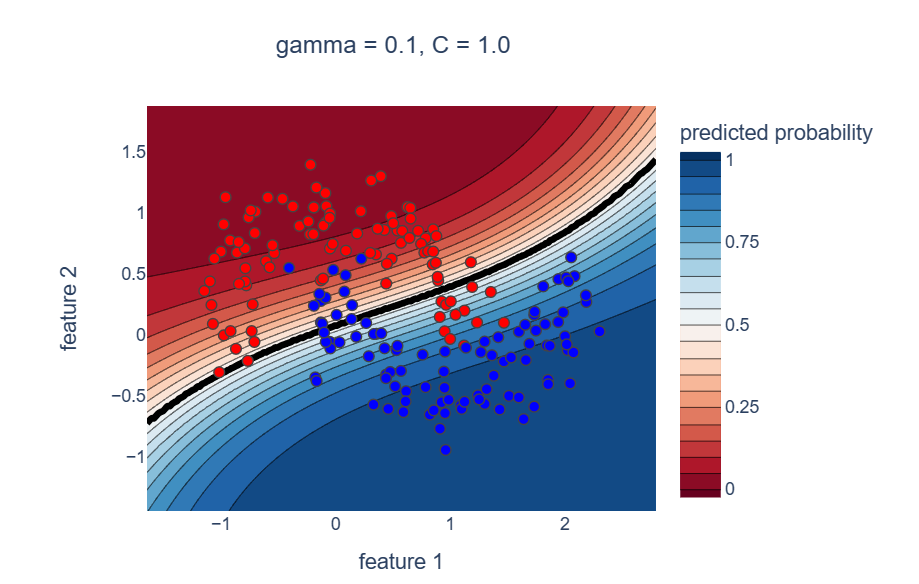
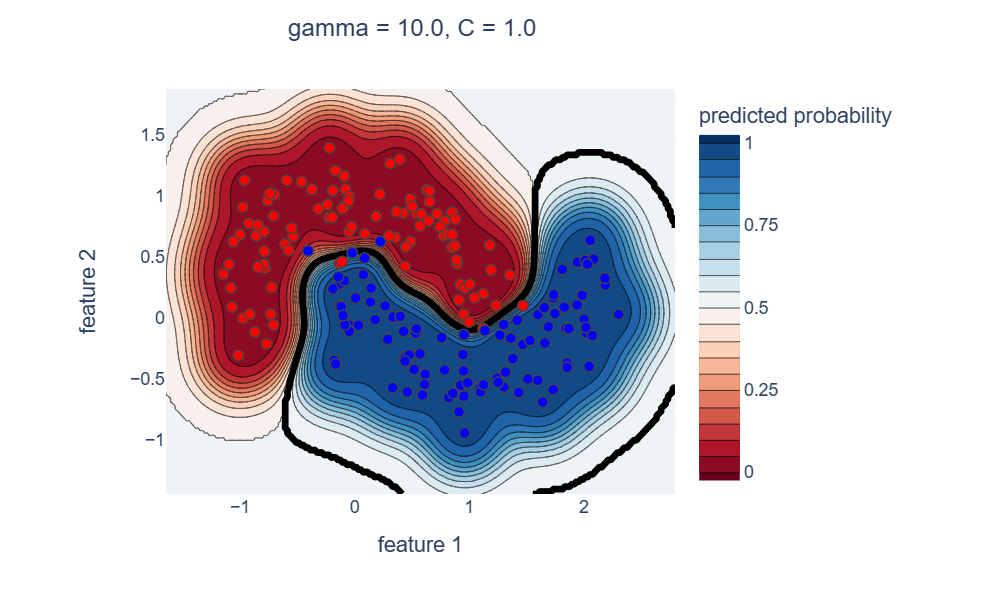

| ML algo | suitable for large datasets? | behaviour wrt outliers | non-linear? | params to tune | smooth predictions | easy to interpret? |
| - | :-: | :-: | :-: | :-: | :-: | :-: |
| linear regression            	|              yes             	|linear extrapolation|      no     	| l1 and/or l2 reg 	| yes | yes|
| logistic regression          	|              yes             	|scales with distance from the decision boundary|      no     	| l1 and/or l2 reg 	| yes | yes|
| random forest regression     	|so so |constant|yes|max_features,  max_depth| no|so so|
| random forest classification 	|so so |step-like, difficult to tell|yes|max_features,  max_depth| no|so so|
| SVM rbf regression               	|no|non-linear extrapolation|yes|C, gamma|yes|so so|
| SVM rbf classification           	|<font color='red'>no</font>|<font color='red'>50-50</font>|<font color='red'>yes</font>|<font color='red'>C, gamma</font>|<font color='red'>yes</font>|<font color='red'>so so </font>|

# Quiz 3
Bias variance trade off

Which gamma value gives the best trade off between high bias and high variance? Work through the steps to answer the question.

- Use random_state = 42 where-ever necessary.
- Split X, y into X_train, X_val, y_train, y_val such that 70% of the points are in train.
- Fit SVC models with C = 1, and gamma = 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3 on the training set.
- Measure the validation accuracy for each gamma.
- Which gamma value gives the highest validation accuracy?


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# create the data
random_state = 42
X, y = make_moons(noise=0.2, random_state=random_state, n_samples=200)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, 
                                                  random_state=random_state)

# set the hyperparameters
gammas = [1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3]
val_score = []
for gamma in gammas:
    clf = SVC(gamma = gamma, C = 1)
    clf.fit(X_train, y_train)
    y_val_pred = clf.predict(X_val)
    val_score.append(accuracy_score(y_val, y_val_pred))
val_score = np.array(val_score)
gammas = np.array(gammas)

print(gammas[np.argmax(val_score)])

1.0


## Mud card